In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Input, Dot, Flatten
from tensorflow.keras.models import Model
import numpy as np


Prepare the Dummy Data
Create dummy data for user-item interactions. For simplicity, you can generate random data:

In [13]:
num_users = 100
num_items = 50
embedding_dim = 100

# Generate dummy data
np.random.seed(0)
user_ids = np.random.randint(0, num_users, size=1000)
item_ids = np.random.randint(0, num_items, size=1000)
ratings = np.random.randint(1, 6, size=1000)


Train the Model
Train the model using the prepared data.

Build the Model
Define the collaborative filtering model using TensorFlow's Keras API:

Make Predictions
Use the trained embeddings to make predictions.

In [14]:
# Input layers
user_input = Input(shape=(1,))
item_input = Input(shape=(1,))

# Embedding layers
user_embedding = Embedding(num_users, embedding_dim)(user_input)
item_embedding = Embedding(num_items, embedding_dim)(item_input)

# Dot product of user and item embeddings
dot_product = Dot(axes=2)([user_embedding, item_embedding])
flat_output = Flatten()(dot_product)

# Create the model
model = Model(inputs=[user_input, item_input], outputs=flat_output)

# Compile the model
model.compile(optimizer='adam', loss='mse')


Train the Model
Train the model using your dummy data:

In [15]:
# Train the model
history = model.fit([user_ids, item_ids], ratings, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 11.4041 - val_loss: 11.2653
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.6310 - val_loss: 11.2506
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.3494 - val_loss: 11.2196
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.2776 - val_loss: 11.1576
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.6803 - val_loss: 11.0322
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.4261 - val_loss: 10.8058
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.5040 - val_loss: 10.4265
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.4523 - val_loss: 9.8579
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7243 - val_loss: 9.0871
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.4645 - val_loss: 8.1226


 Evaluate and Predict
After training, evaluate the model performance and make predictions:

In [18]:
# Example prediction
test_user_ids = np.random.randint(0, num_users, size=10)
test_item_ids = np.random.randint(0, num_items, size=10)
predictions = model.predict([test_user_ids, test_item_ids])
print("Predictions:", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Predictions: [[0.96071917]
 [0.77817327]
 [0.464078  ]
 [0.50295466]
 [0.32689   ]
 [0.6784623 ]
 [1.0562954 ]
 [0.65945774]
 [0.8534551 ]
 [0.6217301 ]]


Visualize Training History (Optional)
Optionally, visualize the training history to see how the loss changes over epochs:

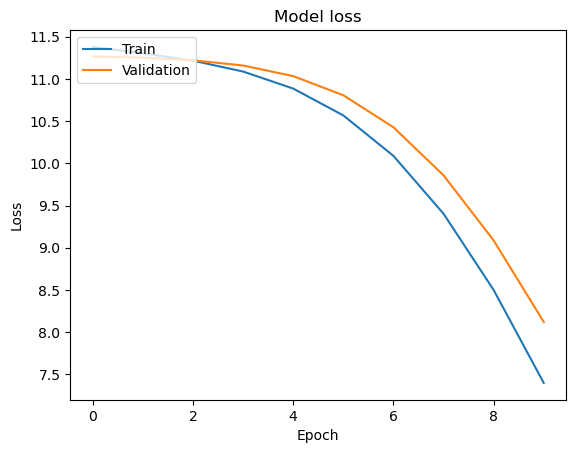

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
